In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data Import

In [ ]:
df = pd.read_csv("/content/Phishing.csv")

EDA

In [ ]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [ ]:
df.shape

(2456, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

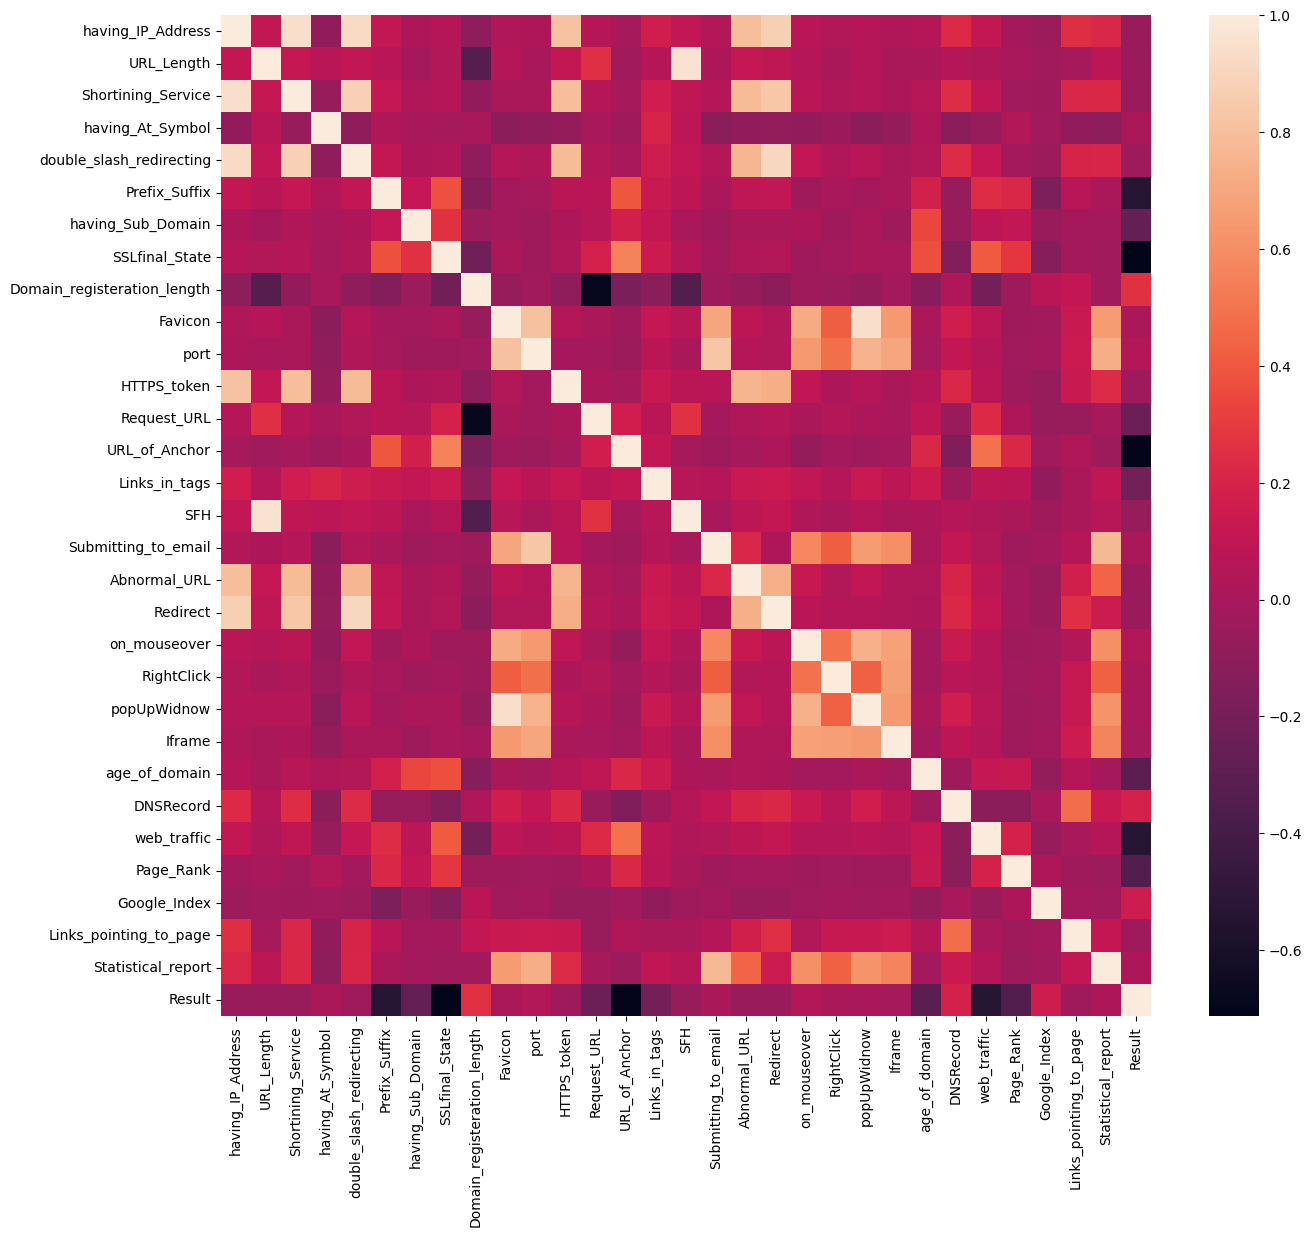

In [ ]:

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [ ]:
X = df.drop('Result',axis =1 )
y = df['Result']

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[1. , 1. , 0. , ..., 0. , 1. , 1. ],
       [0. , 1. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0.5, 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=10)

In [ ]:
X_test

array([[0. , 1. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

ANN

Adam

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8340
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9216
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9384
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9455
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9465
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9521
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9588
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9628
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9644
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9730
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9695121951219512


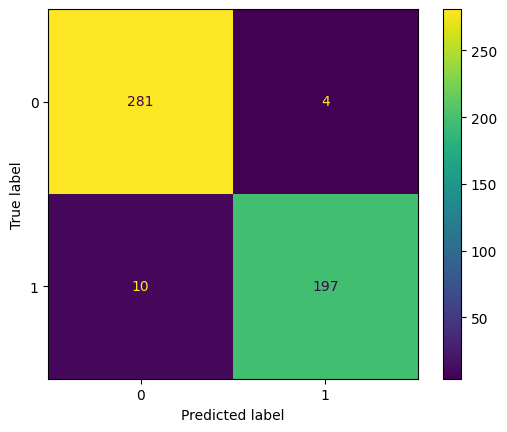

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1], cmap='pastels')

cm_display.plot()
plt.show()

SGD

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='sgd',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 4s 14ms/step - loss: 0.5520 - accuracy: 0.7296
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 0.3781 - accuracy: 0.8747
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.2779 - accuracy: 0.9007
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9104
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9185
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1872 - accuracy: 0.9252
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9348
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9297
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9323
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9404
Epoch 11/50
62/62 

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[278   7]
 [ 20 187]]
0.9451219512195121


RMS prop

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8422
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9190
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1623 - accuracy: 0.9343
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9389
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9430
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9537
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9532
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9532
Epoch 9/50
62/62 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.9613
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9598
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[280   5]
 [  9 198]]
0.9715447154471545


Adadelta

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adadelta',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.7398 - accuracy: 0.4379
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.7369 - accuracy: 0.4404
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.4420
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.7311 - accuracy: 0.4430
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 0.7282 - accuracy: 0.4420
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.4450
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 0.7225 - accuracy: 0.4496
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 0.7197 - accuracy: 0.4532
Epoch 9/50
62/62 [==============================] - 0s 6ms/step - loss: 0.7169 - accuracy: 0.4572
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 0.7141 - accuracy: 0.4649
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[245  40]
 [ 97 110]]
0.7215447154471545


Adagrad

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adagrad',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.5937
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7032
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7714
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8096
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8315
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4602 - accuracy: 0.8529
Epoch 7/50
62/62 [==============================] - 1s 9ms/step - loss: 0.4290 - accuracy: 0.8697
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8809
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8859
Epoch 10/50
62/62 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.8910
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[273  12]
 [ 23 184]]
0.9288617886178862


Adamax

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
#model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adamax',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.5741 - accuracy: 0.6864
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8931
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9267
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9272
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9364
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.9430
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9455
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9496
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.9532
Epoch 10/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9506
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[275  10]
 [  7 200]]
0.9654471544715447


With dropouts

final

In [ ]:
model= Sequential()
#model.add(Dropout(0.1,input_dim=30))
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 4s 8ms/step - loss: 0.4385 - accuracy: 0.8101
Epoch 2/50
62/62 [==============================] - 1s 8ms/step - loss: 0.2762 - accuracy: 0.8910
Epoch 3/50
62/62 [==============================] - 0s 6ms/step - loss: 0.2296 - accuracy: 0.9084
Epoch 4/50
62/62 [==============================] - 0s 8ms/step - loss: 0.2022 - accuracy: 0.9267
Epoch 5/50
62/62 [==============================] - 0s 8ms/step - loss: 0.1886 - accuracy: 0.9308
Epoch 6/50
62/62 [==============================] - 0s 7ms/step - loss: 0.1781 - accuracy: 0.9272
Epoch 7/50
62/62 [==============================] - 0s 6ms/step - loss: 0.1696 - accuracy: 0.9348
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 0.1629 - accuracy: 0.9364
Epoch 9/50
62/62 [==============================] - 0s 7ms/step - loss: 0.1619 - accuracy: 0.9343
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 0.1475 - accuracy: 0.9389
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[279   6]
 [  9 198]]
0.9695121951219512


In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer= opt ,loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.7643
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.8915
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9078
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9272
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.9287
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9374
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9221
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9389
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.1493 - accuracy: 0.9384
Epoch 10/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1451 - accuracy: 0.9465
Epoch 11/50
62/62 [

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred = np.where(y_pred > 0.5 ,1,0)
#y_pred
y_pred = y_pred.astype(int)
#y_pred

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[275  10]
 [  5 202]]
0.9695121951219512


Loss vs Accuracy Curve

Epoch 1/50
62/62 [==============================] - 2s 7ms/step - loss: 0.5099 - accuracy: 0.7363 - val_loss: 0.2529 - val_accuracy: 0.9045
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.8798 - val_loss: 0.1871 - val_accuracy: 0.9309
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.8966 - val_loss: 0.1670 - val_accuracy: 0.9329
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.9058 - val_loss: 0.1726 - val_accuracy: 0.9248
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9155 - val_loss: 0.1510 - val_accuracy: 0.9329
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1965 - accuracy: 0.9206 - val_loss: 0.1367 - val_accuracy: 0.9350
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9206 - val_loss: 0.1383 - val_accuracy: 0.9472
Epoch 8/50
62/62 [==

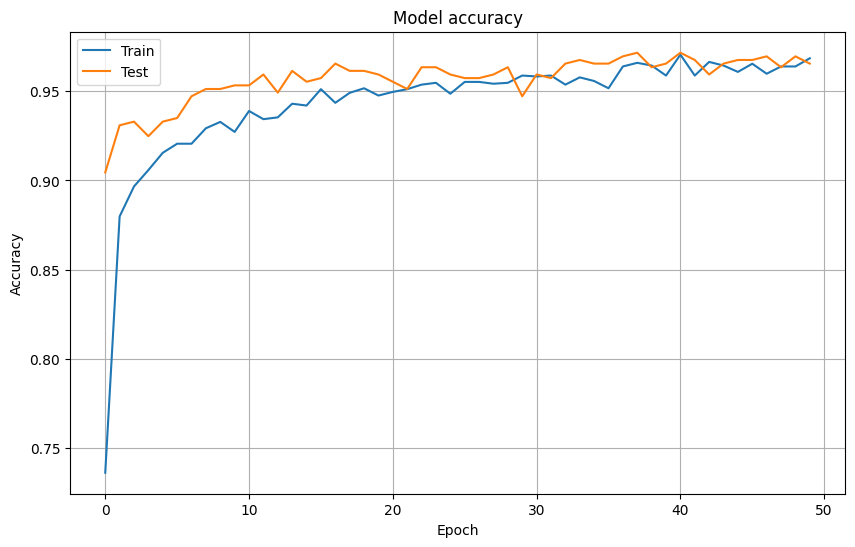

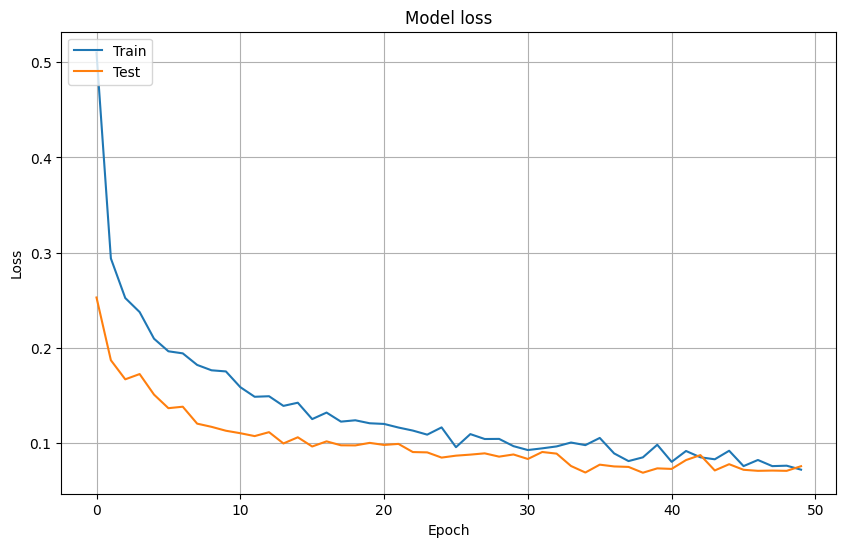

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your ANN model
model= Sequential()
model.add(Dense(52,activation='LeakyReLU',input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(43,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(26,activation='selu'))

model.add(Dense(10,activation='selu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))



# Compile the model
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()


LIME

In [ ]:
!pip install lime

      Result
1835       0
182        0
507        0
2116       1
56         0
...      ...
463        0
1870       1
94         0
2214       0
2395       1

[492 rows x 1 columns]
157/157 [==============================] - 1s 5ms/step


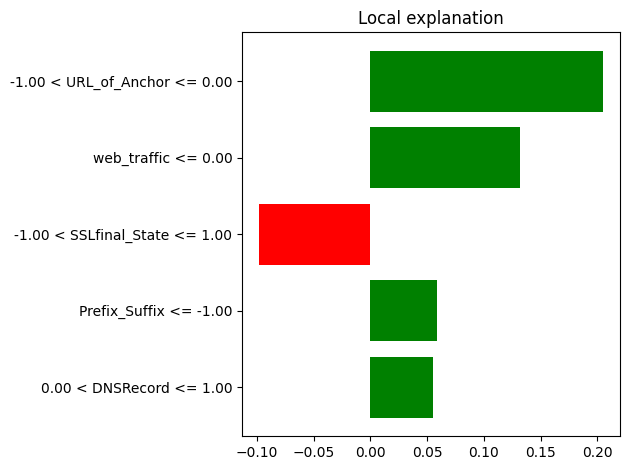

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['Recurred'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], model.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)
#exp.as_pyplot_figure()
#plt.tight_layout()
#plt.show()

ROC curve

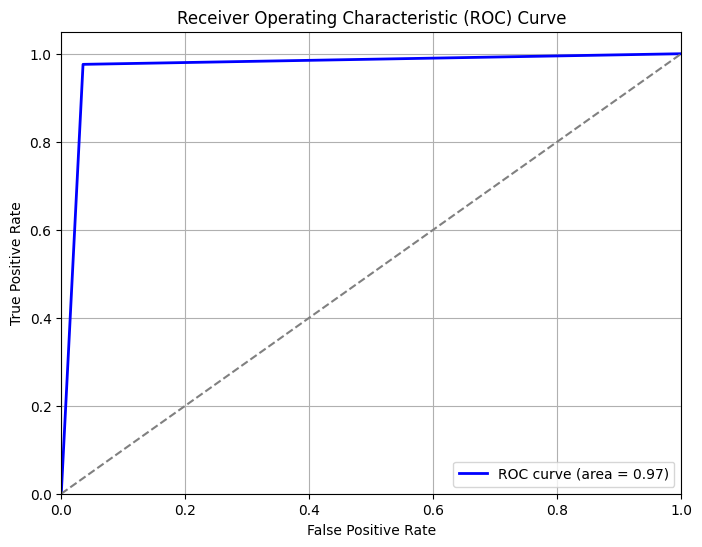

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()